# Self-Driving Car Engineer Nanodegree


## Project: **Vehicle Detection and Tracking** 
***

---

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

## Import Packages

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import imageio

%matplotlib inline

### Loading Datasets

len(cars): 8792
len(notcars): 9003
data_info: {'n_cars': 8792, 'image_shape': (64, 64, 3), 'n_notcars': 9003, 'data_type': dtype('uint8')}
Your function returned a count of 8792  cars and 9003  non-cars
of size:  (64, 64, 3)  and data type: uint8
car_ind: 1089
notcar_ind: 3343
cars[car_ind]: vehicles/GTI_Left/image0294.png
notcars[notcar_ind]: non-vehicles/Extras/extra4499.png
cars[car_ind]: vehicles/GTI_Left/image0294.png


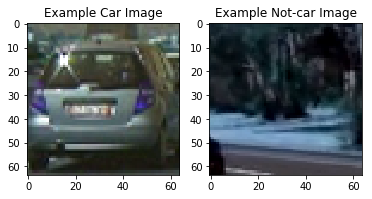

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
#from skimage.feature import hog
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

#images = glob.glob('*.jpeg')
imagesCars = glob.glob('vehicles/**/*.png',recursive=True)
imagesNoCars = glob.glob('non-vehicles/**/*.png',recursive=True)
cars = []
notcars = []

#print("len(images):",len(images))
for imageCar in imagesCars:
    #if 'image' in image or 'extra' in image:
     #   notcars.append(image)
    #else:
     #   cars.append(image)
    cars.append(imageCar)
    
for imageNoCar in imagesNoCars:
    notcars.append(imageNoCar)

print("len(cars):",len(cars))
print("len(notcars):",len(notcars))

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
     # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = cv2.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

data_info = data_look(cars, notcars)
print("data_info:",data_info)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

print("car_ind:",car_ind)
print("notcar_ind:",notcar_ind)
print("cars[car_ind]:",cars[car_ind])
print("notcars[notcar_ind]:",notcars[notcar_ind])
#print("notcars[0]:",notcars[0])
# Read in car / not-car images
car_image = cv2.imread(cars[car_ind])
notcar_image = cv2.imread(notcars[notcar_ind])

print("cars[car_ind]:",cars[car_ind])


# Plot the examples
fig = plt.figure()

plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')

plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')

plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler


### HOG Feature Trial on RGB image 

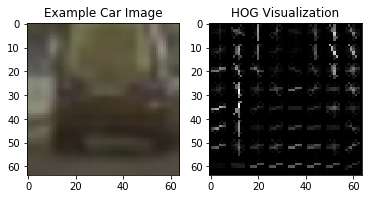

In [5]:
from skimage.feature import hog
pix_per_cell = 8
cell_per_block = 2
orient = 9

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
     if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
     else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = cv2.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

plt.show()



### Trying the other feature extractions - color binning and histogram

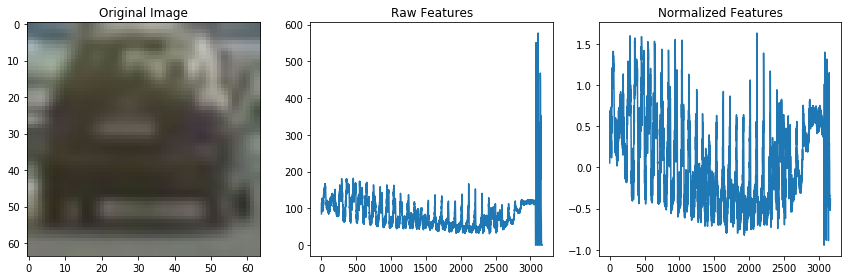

In [6]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = cv2.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features

        
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))


if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(cv2.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

plt.show()

### List of all the functions defined in the lesson quizzes

In [7]:
# Lesson Functions - all the functions covered in the lesson quizzes
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import time

def convert_color(img, conv='YCrCb'):
    if conv == 'YCrCb':#RGB2YCrCb
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if conv == 'HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if conv == 'YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = cv2.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=False))#feature_vec was initally set to True
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=False)#feature_vec was initally set to True
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


### search/classify. Here all the parameters to be tuned are entered

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
svc: LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
decisionFunctionResult: [-2.42631911 -2.20265653  4.91225035 ..., -0.99999496  2.27850259
 -1.9714611 ]
len(decisionFunctionResult): 14236
6.89 Seconds to train SVC...
Test Accuracy of SVC =  0.9924
prediction: [ 0.]
decisionFunctionResult: [-4.05266055]
prediction: [ 0.]
decisionFunctionResult: [-1.55431782]
prediction: [ 0.]
decisionFunctionResult: [-3.05728786]
prediction: [ 0.]
decisionFunctionResult: [-2.99765175]
prediction: [ 0.]
decisionFunctionResult: [-3.68128358]
prediction: [ 0.]
decisionFunctionResult: [-3.89517553]
prediction: [ 0.]
decisionFunctionResult: [-3.66994724]
prediction: [ 0.]
decisionFunctionResult: [-4.27452061]
prediction: [ 0.]
decisionFunctionResult: 

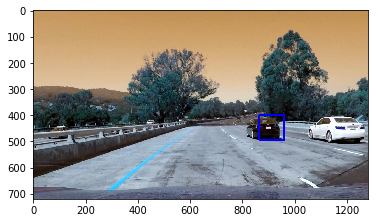

In [8]:

from skimage.feature import hog
import pickle

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        print("prediction:",prediction)
        decisionFunctionResult = clf.decision_function(test_features)
        print("decisionFunctionResult:",decisionFunctionResult)
            
        #7) If positive (prediction == 1) then save the window
        #if prediction == 1:
         #   on_windows.append(window)
        if decisionFunctionResult > 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    
    

### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV'# was'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 656] #[None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC(C=1000)
# Check the training time for the SVC
t=time.time()

svc.fit(X_train, y_train)
decisionFunctionResult = svc.decision_function(X_train)
print("svc:",svc)
print("decisionFunctionResult:",decisionFunctionResult)
print("len(decisionFunctionResult):",len(decisionFunctionResult))
with open("svc_pickle.p", "wb" ) as file:
    pickle.dump({
        'svc':svc,
        'scaler':X_scaler,
        'orient':orient,
        'pix_per_cell':pix_per_cell,
        'cell_per_block':cell_per_block,
        'spatial_size':spatial_size,
        'hist_bins':hist_bins,
        }, file)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = cv2.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.25, 0.25))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)




### Find Cars in windows

dist_pickle: {'cell_per_block': 2, 'spatial_size': (16, 16), 'pix_per_cell': 8, 'hist_bins': 16, 'svc': LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'orient': 9, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


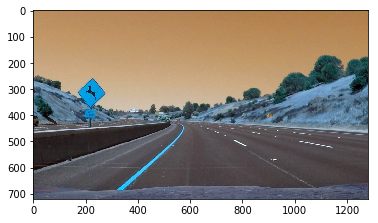

In [17]:
#Hog_Subsample


dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
print("dist_pickle:",dist_pickle)
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

img = cv2.imread('test_images/test2.jpg')


# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins,color_space, boxToSave):
    
    draw_img = np.copy(img)
    #img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv=color_space)#'RGB2HLS'
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            test_decisionFunctionResult = svc.decision_function(test_features)
            
            
            
            ## Note: Commenting this out since I decided to use the result of decision_function() as a threshold to
            ## find windows instead of solely depending on test_prediction. This is to reduce false positives.
            #if test_prediction == 1:
                #print("test_prediction:",test_prediction)
                #print("test_decisionFunctionResult:",test_decisionFunctionResult)
                
            if test_decisionFunctionResult > 0.25: ## Tried different values between 0 and 1 like 0.25, 0.5, 0.75 and 1.
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
                #boxPoint = tuple(tuple([xbox_left,ytop_draw+ystart]),tuple([xbox_left+win_draw,ytop_draw+win_draw+ystart]))
                boxPoint = [(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)]
                boxToSave.append(boxPoint)
                

    return draw_img, boxToSave
    
ystart = 400
ystop = 656
scale = 1.5

scaleArray = [1,1.5,2,2.5,3]

boxToSave = []
for scale in scaleArray:
    out_img, boxToSave = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space, boxToSave)

#print("boxToSave:",boxToSave)
with open("bbox_pickle.p", "wb" ) as file:
    pickle.dump(boxToSave, file)
    
plt.imshow(out_img)

### Add heatmaps

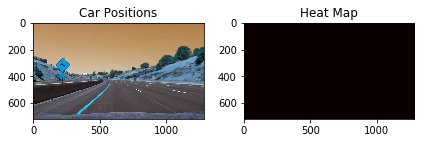

In [18]:
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
#box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
#image = cv2.imread('test_images/test1.jpg')
#heat = np.zeros_like(image[:,:,0]).astype(np.float)

from collections import deque

history = deque(maxlen = 8)


def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
        
    history.append(heatmap)

    # Return updated heatmap
    return heatmap

def apply_threshold(heatmap, threshold): # Changed implementation to take history of frames into consideration.
    # Zero out pixels below the threshold
    sum = 0
    index = 0
    for heatMapElement in history:
        sum = sum + heatMapElement
        index += 1
    
    if(index != 0):
        avgHeatMap = sum/index
    else:
        avgHeatMap = heatmap
        
    avgHeatMap[avgHeatMap <= threshold] = 0
    # Return thresholded map
    return avgHeatMap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    
    for car_number in range(1, labels[1]+1):
        
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list

def removeFalsePositives(imageLocal):
    box_list = pickle.load( open( "bbox_pickle.p", "rb" ))
    # Read in image similar to one shown above
    
    
    
    heat = np.zeros_like(imageLocal[:,:,0]).astype(np.float)
    heat = add_heat(heat,box_list)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,2)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(imageLocal), labels)
    
    return draw_img, heatmap
    
    

image = cv2.imread('test_images/test2.jpg')
draw_img,heatmap = removeFalsePositives(image)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

plt.show()





### Test the pipeline on the 6 images provided

In [11]:
import os
os.listdir("test_images/")

['.DS_Store',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg']

In [12]:
from collections import deque
#history = deque(maxlen = 8)

def process_image(im):
    boxToSave = []
    scaleArray = [1,1.5,2,2.5,3]
    for scale in scaleArray:
        result, boxToSave = find_cars(im, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space, boxToSave)
        
    with open("bbox_pickle.p", "wb" ) as file:
        pickle.dump(boxToSave, file)
    result,heatmap = removeFalsePositives(im)
    boxToSave = []
    #history.append(heatmap)
    return result

countList: <built-in method count of list object at 0x1e98bf708>
test_images/.DS_Store
Unable to open file
test_images/test1.jpg
test_images/test2.jpg
test_images/test3.jpg
test_images/test4.jpg
test_images/test5.jpg
test_images/test6.jpg


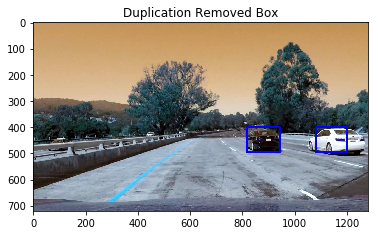

In [15]:
def plotLinesAndSaveToDisk():
    testImageDir = "test_images/"
    outputImageDir = "output_images/"
    list = os.listdir("test_images/")
    print ("countList:",list.count)
    history = deque(maxlen = 8)
    
    for imgName in os.listdir("test_images/"):
        imagePath = testImageDir + imgName
        print(imagePath)
        
         
        try:
            im1 = imageio.imread(imagePath)
            im1 = cv2.imread(imagePath)
            out_img = process_image(im1)
            outputPath = outputImageDir +"output"+ imgName 
            imageio.imwrite(outputPath, out_img)
            
        except ValueError as e:
            print("Unable to open file")
        
            
plotLinesAndSaveToDisk()
sampleOutputImage = imageio.imread("output_images/outputtest1.jpg")
plt.title("Duplication Removed Box")
plt.imshow(sampleOutputImage)

#fig = plt.figure()
#plt.subplot(121)
#plt.imshow(out_img)
#plt.title('Box with duplications')
#plt.subplot(122)
#plt.imshow(heatmap, cmap='hot')
#plt.title('Heat Map')
#fig.tight_layout()


### Video output and inline display

In [13]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

history = deque(maxlen = 8)
outputVideo = 'project_video_output.mp4'
inputVideo  = VideoFileClip("project_video.mp4")
#inputVideo  = VideoFileClip("test_video.mp4")

clip = inputVideo.fl_image(process_image)

%time clip.write_videofile(outputVideo, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


  0%|          | 5/1261 [00:09<38:58,  1.86s/it]

  0%|          | 6/1261 [00:11<38:56,  1.86s/it]

  1%|          | 7/1261 [00:13<39:00,  1.87s/it]

  1%|          | 8/1261 [00:15<39:18,  1.88s/it]

  1%|          | 9/1261 [00:16<39:08,  1.88s/it]

  1%|          | 10/1261 [00:18<39:11,  1.88s/it]

  1%|          | 11/1261 [00:20<39:06,  1.88s/it]

  1%|          | 12/1261 [00:22<39:01,  1.87s/it]

  1%|          | 13/1261 [00:24<39:14,  1.89s/it]

  1%|          | 14/1261 [00:26<39:26,  1.90s/it]

  1%|          | 15/1261 [00:28<39:21,  1.90s/it]

  1%|▏         | 16/1261 [00:30<39:17,  1.89s/it]

  1%|▏         | 17/1261 [00:32<39:17,  1.89s/it]

 10%|█         | 130/1261 [04:05<36:30,  1.94s/it]

 10%|█         | 131/1261 [04:07<36:09,  1.92s/it]

 10%|█         | 132/1261 [04:08<35:55,  1.91s/it]

 11%|█         | 133/1261 [04:10<36:23,  1.94s/it]

 12%|█▏        | 152/1261 [04:46<34:53,  1.89s/it]

 12%|█▏        | 153/1261 [04:48<35:15,  1.91s/it]

 12%|█▏        | 154/1261 [04:50<35:37,  1.93s/it]

 13%|█▎        | 158/1261 [04:58<35:04,  1.91s/it]

 13%|█▎        | 159/1261 [05:00<34:54,  1.90s/it]

 13%|█▎        | 160/1261 [05:02<34:45,  1.89s/it]

 13%|█▎        | 161/1261 [05:04<34:54,  1.90s/it]

 13%|█▎        | 168/1261 [05:17<35:48,  1.97s/it]

 13%|█▎        | 169/1261 [05:19<35:38,  1.96s/it]

 13%|█▎        | 170/1261 [05:21<36:05,  1.99s/it]

 14%|█▎        | 171/1261 [05:23<37:59,  2.09s/it]

 14%|█▎        | 172/1261 [05:26<38:44,  2.13s/it]

 14%|█▎        | 173/1261 [05:28<37:55,  2.09s/it]

 14%|█▍        | 174/1261 [05:30<36:54,  2.04s/it]

 14%|█▍        | 175/1261 [05:32<37:19,  2.06s/it]

 14%|█▍        | 176/1261 [05:34<36:56,  2.04s/it]

 14%|█▍        | 177/1261 [05:36<35:58,  1.99s/it]

 14%|█▍        | 178/1261 [05:37<35:18,  1.96s/it]

 14%|█▍        | 179/1261 [05:39<35:05,  1.95s/it]

 14%|█▍        | 180/1261 [05:41<34:58,  1.94s/it]

 14%|█▍        | 181/1261 [05:43<36:06,  2.01s/it]

 14%|█▍        | 182/1261 [05:45<35:40,  1.98s/it]

 15%|█▍        | 183/1261 [05:47<35:20,  1.97s/it]

 15%|█▍        | 184/1261 [05:49<35:02,  1.95s/it]

 15%|█▍        | 185/1261 [05:51<35:02,  1.95s/it]

 15%|█▍        | 186/1261 [05:53<35:00,  1.95s/it]

 15%|█▍        | 187/1261 [05:55<35:29,  1.98s/it]

 15%|█▍        | 188/1261 [05:57<35:17,  1.97s/it]

 15%|█▍        | 189/1261 [05:59<35:21,  1.98s/it]

 15%|█▌        | 190/1261 [06:02<37:58,  2.13s/it]

 15%|█▌        | 191/1261 [06:04<36:44,  2.06s/it]

 15%|█▌        | 192/1261 [06:05<35:35,  2.00s/it]

 15%|█▌        | 193/1261 [06:07<34:46,  1.95s/it]

 15%|█▌        | 194/1261 [06:09<34:13,  1.92s/it]

 15%|█▌        | 195/1261 [06:11<33:47,  1.90s/it]

 16%|█▌        | 196/1261 [06:13<33:37,  1.89s/it]

 16%|█▌        | 197/1261 [06:15<33:26,  1.89s/it]

 16%|█▌        | 198/1261 [06:17<33:15,  1.88s/it]

 16%|█▌        | 199/1261 [06:18<33:13,  1.88s/it]

 16%|█▌        | 200/1261 [06:20<33:09,  1.87s/it]

 16%|█▌        | 201/1261 [06:22<32:56,  1.86s/it]

 16%|█▌        | 202/1261 [06:24<32:55,  1.87s/it]

 16%|█▌        | 203/1261 [06:26<32:56,  1.87s/it]

 16%|█▌        | 204/1261 [06:28<32:43,  1.86s/it]

 16%|█▋        | 205/1261 [06:30<32:46,  1.86s/it]

 16%|█▋        | 206/1261 [06:31<32:49,  1.87s/it]

 16%|█▋        | 207/1261 [06:33<32:47,  1.87s/it]

 16%|█▋        | 208/1261 [06:35<32:40,  1.86s/it]

 17%|█▋        | 209/1261 [06:37<32:32,  1.86s/it]

 17%|█▋        | 210/1261 [06:39<32:26,  1.85s/it]

 17%|█▋        | 211/1261 [06:41<32:23,  1.85s/it]

 17%|█▋        | 212/1261 [06:43<32:34,  1.86s/it]

 17%|█▋        | 213/1261 [06:45<34:15,  1.96s/it]

 17%|█▋        | 214/1261 [06:47<34:05,  1.95s/it]

 17%|█▋        | 215/1261 [06:49<33:58,  1.95s/it]

 17%|█▋        | 216/1261 [06:51<34:13,  1.96s/it]

 17%|█▋        | 217/1261 [06:53<35:26,  2.04s/it]

 17%|█▋        | 218/1261 [06:55<35:05,  2.02s/it]

 17%|█▋        | 219/1261 [06:57<35:11,  2.03s/it]

 17%|█▋        | 220/1261 [06:59<34:27,  1.99s/it]

 18%|█▊        | 221/1261 [07:01<33:56,  1.96s/it]

 18%|█▊        | 222/1261 [07:03<33:31,  1.94s/it]

 18%|█▊        | 223/1261 [07:05<33:25,  1.93s/it]

 18%|█▊        | 224/1261 [07:06<33:13,  1.92s/it]

 18%|█▊        | 225/1261 [07:08<33:00,  1.91s/it]

 18%|█▊        | 226/1261 [07:10<32:55,  1.91s/it]

 18%|█▊        | 227/1261 [07:12<32:49,  1.90s/it]

 18%|█▊        | 228/1261 [07:14<32:38,  1.90s/it]

 18%|█▊        | 229/1261 [07:16<32:43,  1.90s/it]

 18%|█▊        | 230/1261 [07:18<32:32,  1.89s/it]

 18%|█▊        | 231/1261 [07:20<32:42,  1.91s/it]

 18%|█▊        | 232/1261 [07:22<32:34,  1.90s/it]

 18%|█▊        | 233/1261 [07:23<32:35,  1.90s/it]

 19%|█▊        | 234/1261 [07:25<32:24,  1.89s/it]

 19%|█▊        | 235/1261 [07:27<32:55,  1.93s/it]

 19%|█▊        | 236/1261 [07:29<32:37,  1.91s/it]

 19%|█▉        | 237/1261 [07:31<33:02,  1.94s/it]

 19%|█▉        | 238/1261 [07:33<33:10,  1.95s/it]

 19%|█▉        | 239/1261 [07:35<33:34,  1.97s/it]

 19%|█▉        | 240/1261 [07:37<33:46,  1.98s/it]

 19%|█▉        | 241/1261 [07:39<33:00,  1.94s/it]

 19%|█▉        | 242/1261 [07:41<32:31,  1.92s/it]

 19%|█▉        | 243/1261 [07:43<32:32,  1.92s/it]

 19%|█▉        | 244/1261 [07:45<34:07,  2.01s/it]

 19%|█▉        | 245/1261 [07:47<33:49,  2.00s/it]

 20%|█▉        | 246/1261 [07:49<33:31,  1.98s/it]

 20%|█▉        | 247/1261 [07:51<33:30,  1.98s/it]

 20%|█▉        | 248/1261 [07:53<32:52,  1.95s/it]

 20%|█▉        | 249/1261 [07:55<32:17,  1.91s/it]

 20%|█▉        | 250/1261 [07:57<32:05,  1.90s/it]

 20%|█▉        | 251/1261 [07:59<33:05,  1.97s/it]

 20%|█▉        | 252/1261 [08:01<32:40,  1.94s/it]

 20%|██        | 253/1261 [08:02<32:20,  1.92s/it]

 20%|██        | 254/1261 [08:05<37:18,  2.22s/it]

 20%|██        | 255/1261 [08:08<36:56,  2.20s/it]

 20%|██        | 256/1261 [08:10<35:57,  2.15s/it]

 20%|██        | 257/1261 [08:12<35:20,  2.11s/it]

 20%|██        | 258/1261 [08:13<34:05,  2.04s/it]

 21%|██        | 259/1261 [08:16<34:37,  2.07s/it]

 21%|██        | 260/1261 [08:17<33:45,  2.02s/it]

 21%|██        | 261/1261 [08:19<33:01,  1.98s/it]

 21%|██        | 262/1261 [08:21<32:35,  1.96s/it]

 21%|██        | 263/1261 [08:23<33:07,  1.99s/it]

 21%|██        | 264/1261 [08:25<32:44,  1.97s/it]

 21%|██        | 265/1261 [08:27<32:32,  1.96s/it]

 21%|██        | 266/1261 [08:29<32:11,  1.94s/it]

 21%|██        | 267/1261 [08:31<31:54,  1.93s/it]

 21%|██▏       | 268/1261 [08:33<32:08,  1.94s/it]

 21%|██▏       | 269/1261 [08:36<39:30,  2.39s/it]

 21%|██▏       | 270/1261 [08:39<41:17,  2.50s/it]

 21%|██▏       | 271/1261 [08:42<40:36,  2.46s/it]

 22%|██▏       | 272/1261 [08:44<42:52,  2.60s/it]

 22%|██▏       | 273/1261 [08:47<41:06,  2.50s/it]

 22%|██▏       | 274/1261 [08:49<39:57,  2.43s/it]

 22%|██▏       | 275/1261 [08:51<38:27,  2.34s/it]

 22%|██▏       | 276/1261 [08:53<36:38,  2.23s/it]

 22%|██▏       | 277/1261 [08:56<41:50,  2.55s/it]

 22%|██▏       | 278/1261 [08:59<41:21,  2.52s/it]

 22%|██▏       | 279/1261 [09:01<40:03,  2.45s/it]

 22%|██▏       | 280/1261 [09:03<37:23,  2.29s/it]

 22%|██▏       | 281/1261 [09:06<40:32,  2.48s/it]

 22%|██▏       | 282/1261 [09:08<37:37,  2.31s/it]

 22%|██▏       | 283/1261 [09:10<35:31,  2.18s/it]

 23%|██▎       | 284/1261 [09:12<33:53,  2.08s/it]

 23%|██▎       | 285/1261 [09:13<32:45,  2.01s/it]

 23%|██▎       | 286/1261 [09:16<32:55,  2.03s/it]

 23%|██▎       | 287/1261 [09:18<34:31,  2.13s/it]

 23%|██▎       | 288/1261 [09:20<33:27,  2.06s/it]

 23%|██▎       | 289/1261 [09:22<33:15,  2.05s/it]

 23%|██▎       | 290/1261 [09:24<33:04,  2.04s/it]

 23%|██▎       | 291/1261 [09:26<32:38,  2.02s/it]

 23%|██▎       | 292/1261 [09:29<37:09,  2.30s/it]

 23%|██▎       | 293/1261 [09:31<36:59,  2.29s/it]

 23%|██▎       | 294/1261 [09:33<35:09,  2.18s/it]

 23%|██▎       | 295/1261 [09:35<36:47,  2.29s/it]

 23%|██▎       | 296/1261 [09:38<37:30,  2.33s/it]

 24%|██▎       | 297/1261 [09:40<36:21,  2.26s/it]

 24%|██▎       | 298/1261 [09:42<35:36,  2.22s/it]

 24%|██▎       | 299/1261 [09:44<34:18,  2.14s/it]

 24%|██▍       | 300/1261 [09:47<37:44,  2.36s/it]

 24%|██▍       | 301/1261 [09:49<36:38,  2.29s/it]

 24%|██▍       | 302/1261 [09:51<36:23,  2.28s/it]

 24%|██▍       | 303/1261 [09:53<34:58,  2.19s/it]

 24%|██▍       | 304/1261 [09:55<34:15,  2.15s/it]

 24%|██▍       | 305/1261 [09:57<33:47,  2.12s/it]

 24%|██▍       | 306/1261 [09:59<33:18,  2.09s/it]

 24%|██▍       | 307/1261 [10:01<32:37,  2.05s/it]

 24%|██▍       | 308/1261 [10:04<33:31,  2.11s/it]

 25%|██▍       | 309/1261 [10:06<34:23,  2.17s/it]

 25%|██▍       | 310/1261 [10:08<35:36,  2.25s/it]

 25%|██▍       | 311/1261 [10:11<35:50,  2.26s/it]

 25%|██▍       | 312/1261 [10:14<42:03,  2.66s/it]

 25%|██▍       | 313/1261 [10:17<41:18,  2.61s/it]

 25%|██▍       | 314/1261 [10:19<38:10,  2.42s/it]

 25%|██▍       | 315/1261 [10:21<36:11,  2.30s/it]

 25%|██▌       | 316/1261 [10:23<34:46,  2.21s/it]

 25%|██▌       | 317/1261 [10:25<33:15,  2.11s/it]

 25%|██▌       | 318/1261 [10:27<32:13,  2.05s/it]

 25%|██▌       | 319/1261 [10:28<31:31,  2.01s/it]

 25%|██▌       | 320/1261 [10:30<30:57,  1.97s/it]

 25%|██▌       | 321/1261 [10:32<30:39,  1.96s/it]

 26%|██▌       | 322/1261 [10:34<31:31,  2.01s/it]

 26%|██▌       | 323/1261 [10:36<31:00,  1.98s/it]

 26%|██▌       | 324/1261 [10:38<30:47,  1.97s/it]

 26%|██▌       | 325/1261 [10:40<30:22,  1.95s/it]

 26%|██▌       | 326/1261 [10:42<30:07,  1.93s/it]

 26%|██▌       | 327/1261 [10:44<29:56,  1.92s/it]

 26%|██▌       | 328/1261 [10:46<29:42,  1.91s/it]

 26%|██▌       | 329/1261 [10:48<29:58,  1.93s/it]

 26%|██▌       | 330/1261 [10:50<29:49,  1.92s/it]

 26%|██▌       | 331/1261 [10:52<30:02,  1.94s/it]

 26%|██▋       | 332/1261 [10:54<30:22,  1.96s/it]

 26%|██▋       | 333/1261 [10:56<30:06,  1.95s/it]

 26%|██▋       | 334/1261 [10:58<30:07,  1.95s/it]

 27%|██▋       | 335/1261 [10:59<29:44,  1.93s/it]

 27%|██▋       | 336/1261 [11:01<29:26,  1.91s/it]

 27%|██▋       | 337/1261 [11:03<29:22,  1.91s/it]

 27%|██▋       | 338/1261 [11:05<29:37,  1.93s/it]

 27%|██▋       | 339/1261 [11:07<29:31,  1.92s/it]

 27%|██▋       | 340/1261 [11:09<30:35,  1.99s/it]

 27%|██▋       | 341/1261 [11:11<30:58,  2.02s/it]

 27%|██▋       | 342/1261 [11:13<30:56,  2.02s/it]

 27%|██▋       | 343/1261 [11:15<30:14,  1.98s/it]

 27%|██▋       | 344/1261 [11:17<29:40,  1.94s/it]

 27%|██▋       | 345/1261 [11:19<29:23,  1.93s/it]

 27%|██▋       | 346/1261 [11:21<29:01,  1.90s/it]

 28%|██▊       | 347/1261 [11:23<28:47,  1.89s/it]

 28%|██▊       | 348/1261 [11:25<28:42,  1.89s/it]

 28%|██▊       | 349/1261 [11:27<28:55,  1.90s/it]

 28%|██▊       | 350/1261 [11:28<28:48,  1.90s/it]

 28%|██▊       | 351/1261 [11:30<28:38,  1.89s/it]

 28%|██▊       | 352/1261 [11:32<28:24,  1.87s/it]

 28%|██▊       | 353/1261 [11:34<28:22,  1.87s/it]

 28%|██▊       | 354/1261 [11:36<28:18,  1.87s/it]

 28%|██▊       | 355/1261 [11:38<29:18,  1.94s/it]

 28%|██▊       | 356/1261 [11:40<29:07,  1.93s/it]

 28%|██▊       | 357/1261 [11:42<29:09,  1.94s/it]

 28%|██▊       | 358/1261 [11:44<28:48,  1.91s/it]

 28%|██▊       | 359/1261 [11:46<28:28,  1.89s/it]

 29%|██▊       | 360/1261 [11:47<28:16,  1.88s/it]

 29%|██▊       | 361/1261 [11:49<28:08,  1.88s/it]

 29%|██▊       | 362/1261 [11:51<28:03,  1.87s/it]

 29%|██▉       | 363/1261 [11:53<28:10,  1.88s/it]

 29%|██▉       | 364/1261 [11:55<28:19,  1.89s/it]

 29%|██▉       | 365/1261 [11:57<29:23,  1.97s/it]

 29%|██▉       | 366/1261 [11:59<30:00,  2.01s/it]

 29%|██▉       | 367/1261 [12:01<29:14,  1.96s/it]

 29%|██▉       | 368/1261 [12:03<28:49,  1.94s/it]

 29%|██▉       | 369/1261 [12:05<28:36,  1.92s/it]

 29%|██▉       | 370/1261 [12:07<28:22,  1.91s/it]

 29%|██▉       | 371/1261 [12:09<28:13,  1.90s/it]

 30%|██▉       | 372/1261 [12:11<28:26,  1.92s/it]

 30%|██▉       | 373/1261 [12:13<28:29,  1.92s/it]

 30%|██▉       | 374/1261 [12:14<28:43,  1.94s/it]

 30%|██▉       | 375/1261 [12:17<29:05,  1.97s/it]

 30%|██▉       | 376/1261 [12:19<29:12,  1.98s/it]

 30%|██▉       | 377/1261 [12:24<44:15,  3.00s/it]

 30%|██▉       | 378/1261 [12:28<49:22,  3.35s/it]

 30%|███       | 379/1261 [12:32<50:16,  3.42s/it]

 30%|███       | 380/1261 [12:36<54:16,  3.70s/it]

 30%|███       | 381/1261 [12:40<56:21,  3.84s/it]

 30%|███       | 382/1261 [12:46<1:04:45,  4.42s/it]

 30%|███       | 383/1261 [12:51<1:06:04,  4.52s/it]

 30%|███       | 384/1261 [12:55<1:04:31,  4.41s/it]

 31%|███       | 385/1261 [12:59<1:01:12,  4.19s/it]

 31%|███       | 386/1261 [13:03<1:00:28,  4.15s/it]

 31%|███       | 387/1261 [13:08<1:06:14,  4.55s/it]

 31%|███       | 388/1261 [13:12<1:05:03,  4.47s/it]

 31%|███       | 389/1261 [13:17<1:03:48,  4.39s/it]

 31%|███       | 390/1261 [13:21<1:03:40,  4.39s/it]

 31%|███       | 391/1261 [13:25<1:02:08,  4.29s/it]

 31%|███       | 392/1261 [13:29<59:55,  4.14s/it]  

 31%|███       | 393/1261 [13:33<58:45,  4.06s/it]

 31%|███       | 394/1261 [13:37<59:16,  4.10s/it]

 31%|███▏      | 395/1261 [13:41<59:15,  4.11s/it]

 31%|███▏      | 396/1261 [13:45<58:28,  4.06s/it]

 31%|███▏      | 397/1261 [13:49<58:07,  4.04s/it]

 32%|███▏      | 398/1261 [13:53<56:24,  3.92s/it]

 32%|███▏      | 399/1261 [13:56<55:55,  3.89s/it]

 32%|███▏      | 400/1261 [14:01<56:56,  3.97s/it]

 32%|███▏      | 401/1261 [14:05<59:04,  4.12s/it]

 32%|███▏      | 402/1261 [14:09<58:45,  4.10s/it]

 32%|███▏      | 403/1261 [14:14<1:00:23,  4.22s/it]

 32%|███▏      | 404/1261 [14:18<1:01:09,  4.28s/it]

 32%|███▏      | 405/1261 [14:22<59:18,  4.16s/it]  

 32%|███▏      | 406/1261 [14:26<59:08,  4.15s/it]

 32%|███▏      | 407/1261 [14:30<58:58,  4.14s/it]

 32%|███▏      | 408/1261 [14:34<58:25,  4.11s/it]

 32%|███▏      | 409/1261 [14:39<1:00:49,  4.28s/it]

 33%|███▎      | 410/1261 [14:44<1:02:40,  4.42s/it]

 33%|███▎      | 411/1261 [14:48<1:04:29,  4.55s/it]

 33%|███▎      | 412/1261 [14:53<1:02:39,  4.43s/it]

 33%|███▎      | 413/1261 [14:57<1:01:50,  4.38s/it]

 33%|███▎      | 414/1261 [15:01<1:01:46,  4.38s/it]

 33%|███▎      | 415/1261 [15:06<1:02:52,  4.46s/it]

 33%|███▎      | 416/1261 [15:11<1:05:26,  4.65s/it]

 33%|███▎      | 417/1261 [15:16<1:05:04,  4.63s/it]

 33%|███▎      | 418/1261 [15:20<1:02:17,  4.43s/it]

 33%|███▎      | 419/1261 [15:24<1:01:37,  4.39s/it]

 33%|███▎      | 420/1261 [15:31<1:11:32,  5.10s/it]

 33%|███▎      | 421/1261 [15:34<1:05:40,  4.69s/it]

 33%|███▎      | 422/1261 [15:36<54:24,  3.89s/it]  

 34%|███▎      | 423/1261 [15:39<47:40,  3.41s/it]

 34%|███▎      | 424/1261 [15:41<41:21,  2.96s/it]

 34%|███▎      | 425/1261 [15:42<36:51,  2.65s/it]

 34%|███▍      | 426/1261 [15:44<34:02,  2.45s/it]

 34%|███▍      | 427/1261 [15:46<32:03,  2.31s/it]

 34%|███▍      | 428/1261 [15:48<30:35,  2.20s/it]

 34%|███▍      | 429/1261 [15:50<29:16,  2.11s/it]

 34%|███▍      | 430/1261 [15:52<28:38,  2.07s/it]

 34%|███▍      | 431/1261 [15:54<28:05,  2.03s/it]

 34%|███▍      | 432/1261 [15:56<27:44,  2.01s/it]

 34%|███▍      | 433/1261 [15:58<27:24,  1.99s/it]

 34%|███▍      | 434/1261 [16:00<27:13,  1.98s/it]

 34%|███▍      | 435/1261 [16:02<27:03,  1.97s/it]

 35%|███▍      | 436/1261 [16:04<26:57,  1.96s/it]

 35%|███▍      | 437/1261 [16:06<26:40,  1.94s/it]

 35%|███▍      | 438/1261 [16:08<26:20,  1.92s/it]

 35%|███▍      | 439/1261 [16:10<26:17,  1.92s/it]

 35%|███▍      | 440/1261 [16:11<26:07,  1.91s/it]

 35%|███▍      | 441/1261 [16:13<26:02,  1.91s/it]

 35%|███▌      | 442/1261 [16:15<26:02,  1.91s/it]

 35%|███▌      | 443/1261 [16:17<25:58,  1.91s/it]

 35%|███▌      | 444/1261 [16:19<25:56,  1.90s/it]

 35%|███▌      | 445/1261 [16:21<25:58,  1.91s/it]

 35%|███▌      | 446/1261 [16:23<25:57,  1.91s/it]

 35%|███▌      | 447/1261 [16:25<25:51,  1.91s/it]

 36%|███▌      | 448/1261 [16:27<25:49,  1.91s/it]

 36%|███▌      | 449/1261 [16:29<25:34,  1.89s/it]

 36%|███▌      | 450/1261 [16:31<25:47,  1.91s/it]

 36%|███▌      | 451/1261 [16:32<25:52,  1.92s/it]

 36%|███▌      | 452/1261 [16:34<25:42,  1.91s/it]

 36%|███▌      | 453/1261 [16:36<25:40,  1.91s/it]

 36%|███▌      | 454/1261 [16:38<25:34,  1.90s/it]

 36%|███▌      | 455/1261 [16:40<25:49,  1.92s/it]

 36%|███▌      | 456/1261 [16:42<25:43,  1.92s/it]

 36%|███▌      | 457/1261 [16:44<25:43,  1.92s/it]

 36%|███▋      | 458/1261 [16:46<25:40,  1.92s/it]

 36%|███▋      | 459/1261 [16:48<25:41,  1.92s/it]

 36%|███▋      | 460/1261 [16:50<25:42,  1.93s/it]

 37%|███▋      | 461/1261 [16:52<25:38,  1.92s/it]

 37%|███▋      | 462/1261 [16:54<25:28,  1.91s/it]

 37%|███▋      | 463/1261 [16:55<25:28,  1.92s/it]

 37%|███▋      | 464/1261 [16:57<25:36,  1.93s/it]

 37%|███▋      | 465/1261 [16:59<25:34,  1.93s/it]

 37%|███▋      | 466/1261 [17:01<25:21,  1.91s/it]

 37%|███▋      | 467/1261 [17:03<25:29,  1.93s/it]

 37%|███▋      | 468/1261 [17:05<25:35,  1.94s/it]

 37%|███▋      | 469/1261 [17:07<25:45,  1.95s/it]

 37%|███▋      | 470/1261 [17:09<25:33,  1.94s/it]

 37%|███▋      | 471/1261 [17:11<25:26,  1.93s/it]

 37%|███▋      | 472/1261 [17:13<25:13,  1.92s/it]

 38%|███▊      | 473/1261 [17:15<25:06,  1.91s/it]

 38%|███▊      | 474/1261 [17:17<24:56,  1.90s/it]

 38%|███▊      | 475/1261 [17:19<24:59,  1.91s/it]

 38%|███▊      | 476/1261 [17:20<25:06,  1.92s/it]

 38%|███▊      | 477/1261 [17:22<24:55,  1.91s/it]

 38%|███▊      | 478/1261 [17:24<24:50,  1.90s/it]

 38%|███▊      | 479/1261 [17:26<24:55,  1.91s/it]

 38%|███▊      | 480/1261 [17:28<25:02,  1.92s/it]

 38%|███▊      | 481/1261 [17:30<24:56,  1.92s/it]

 38%|███▊      | 482/1261 [17:32<24:46,  1.91s/it]

 38%|███▊      | 483/1261 [17:34<24:34,  1.90s/it]

 38%|███▊      | 484/1261 [17:36<24:34,  1.90s/it]

 38%|███▊      | 485/1261 [17:38<24:40,  1.91s/it]

 39%|███▊      | 486/1261 [17:39<24:29,  1.90s/it]

 39%|███▊      | 487/1261 [17:41<24:32,  1.90s/it]

 39%|███▊      | 488/1261 [17:43<24:42,  1.92s/it]

 39%|███▉      | 489/1261 [17:45<24:37,  1.91s/it]

 39%|███▉      | 490/1261 [17:47<24:29,  1.91s/it]

 39%|███▉      | 491/1261 [17:49<24:23,  1.90s/it]

 39%|███▉      | 492/1261 [17:51<24:28,  1.91s/it]

 39%|███▉      | 493/1261 [17:53<24:31,  1.92s/it]

 39%|███▉      | 494/1261 [17:55<24:28,  1.92s/it]

 39%|███▉      | 495/1261 [17:57<24:23,  1.91s/it]

 39%|███▉      | 496/1261 [17:59<24:24,  1.91s/it]

 39%|███▉      | 497/1261 [18:01<24:33,  1.93s/it]

 39%|███▉      | 498/1261 [18:03<24:28,  1.93s/it]

 40%|███▉      | 499/1261 [18:04<24:22,  1.92s/it]

 40%|███▉      | 500/1261 [18:06<24:20,  1.92s/it]

 40%|███▉      | 501/1261 [18:08<24:22,  1.92s/it]

 40%|███▉      | 502/1261 [18:10<24:18,  1.92s/it]

 40%|███▉      | 503/1261 [18:12<24:15,  1.92s/it]

 40%|███▉      | 504/1261 [18:14<24:11,  1.92s/it]

 40%|████      | 505/1261 [18:16<24:14,  1.92s/it]

 40%|████      | 506/1261 [18:18<24:09,  1.92s/it]

 40%|████      | 507/1261 [18:20<24:06,  1.92s/it]

 40%|████      | 508/1261 [18:22<23:58,  1.91s/it]

 40%|████      | 509/1261 [18:24<23:55,  1.91s/it]

 40%|████      | 510/1261 [18:26<23:56,  1.91s/it]

 41%|████      | 511/1261 [18:27<23:57,  1.92s/it]

 41%|████      | 512/1261 [18:29<23:49,  1.91s/it]

 41%|████      | 513/1261 [18:31<23:49,  1.91s/it]

 41%|████      | 514/1261 [18:33<23:46,  1.91s/it]

 41%|████      | 515/1261 [18:35<23:39,  1.90s/it]

 41%|████      | 516/1261 [18:37<23:37,  1.90s/it]

 41%|████      | 517/1261 [18:39<23:25,  1.89s/it]

 41%|████      | 519/1261 [18:43<23:22,  1.89s/it]

 41%|████      | 520/1261 [18:44<23:23,  1.89s/it]

 41%|████▏     | 521/1261 [18:46<23:18,  1.89s/it]

 41%|████▏     | 522/1261 [18:48<23:28,  1.91s/it]

 41%|████▏     | 523/1261 [18:50<23:20,  1.90s/it]

 42%|████▏     | 524/1261 [18:52<23:29,  1.91s/it]

 42%|████▏     | 525/1261 [18:54<23:29,  1.91s/it]

 42%|████▏     | 526/1261 [18:56<23:42,  1.94s/it]

 42%|████▏     | 527/1261 [18:58<23:48,  1.95s/it]

 42%|████▏     | 528/1261 [19:00<23:39,  1.94s/it]

 42%|████▏     | 529/1261 [19:02<23:30,  1.93s/it]

 42%|████▏     | 530/1261 [19:04<23:54,  1.96s/it]

 42%|████▏     | 531/1261 [19:06<23:56,  1.97s/it]

 42%|████▏     | 532/1261 [19:08<23:45,  1.95s/it]

 42%|████▏     | 533/1261 [19:10<23:37,  1.95s/it]

 42%|████▏     | 534/1261 [19:12<23:29,  1.94s/it]

 42%|████▏     | 535/1261 [19:14<23:25,  1.94s/it]

 43%|████▎     | 536/1261 [19:15<23:15,  1.92s/it]

 43%|████▎     | 537/1261 [19:18<24:04,  2.00s/it]

 48%|████▊     | 604/1261 [21:24<20:35,  1.88s/it]

 48%|████▊     | 606/1261 [21:28<20:46,  1.90s/it]

 48%|████▊     | 607/1261 [21:30<20:41,  1.90s/it]

 48%|████▊     | 608/1261 [21:32<20:43,  1.90s/it]

 48%|████▊     | 609/1261 [21:34<20:43,  1.91s/it]

 48%|████▊     | 610/1261 [21:36<20:40,  1.91s/it]

 49%|████▉     | 620/1261 [21:55<20:03,  1.88s/it]

 49%|████▉     | 621/1261 [21:56<20:08,  1.89s/it]

 49%|████▉     | 622/1261 [21:58<20:05,  1.89s/it]

 49%|████▉     | 623/1261 [22:00<20:16,  1.91s/it]

 49%|████▉     | 624/1261 [22:02<20:12,  1.90s/it]

 50%|████▉     | 625/1261 [22:04<20:10,  1.90s/it]

 50%|████▉     | 626/1261 [22:06<20:04,  1.90s/it]

 50%|████▉     | 627/1261 [22:08<20:04,  1.90s/it]

 50%|████▉     | 628/1261 [22:10<19:59,  1.90s/it]

 50%|████▉     | 629/1261 [22:12<19:55,  1.89s/it]

 50%|████▉     | 630/1261 [22:14<19:50,  1.89s/it]

 50%|█████     | 631/1261 [22:15<19:49,  1.89s/it]

 50%|█████     | 632/1261 [22:17<19:43,  1.88s/it]

 50%|█████     | 633/1261 [22:19<19:51,  1.90s/it]

 52%|█████▏    | 654/1261 [22:59<19:07,  1.89s/it]

 52%|█████▏    | 655/1261 [23:00<18:58,  1.88s/it]

 52%|█████▏    | 656/1261 [23:02<18:53,  1.87s/it]

 52%|█████▏    | 657/1261 [23:04<19:40,  1.95s/it]

 52%|█████▏    | 658/1261 [23:07<19:55,  1.98s/it]

 52%|█████▏    | 659/1261 [23:09<19:53,  1.98s/it]

 52%|█████▏    | 660/1261 [23:10<19:43,  1.97s/it]

 52%|█████▏    | 661/1261 [23:12<19:31,  1.95s/it]

 52%|█████▏    | 662/1261 [23:14<19:19,  1.93s/it]

 53%|█████▎    | 663/1261 [23:16<19:11,  1.93s/it]

 53%|█████▎    | 664/1261 [23:18<19:04,  1.92s/it]

 53%|█████▎    | 665/1261 [23:20<19:03,  1.92s/it]

 53%|█████▎    | 666/1261 [23:22<18:55,  1.91s/it]

 53%|█████▎    | 667/1261 [23:24<18:46,  1.90s/it]

 53%|█████▎    | 668/1261 [23:26<18:44,  1.90s/it]

 53%|█████▎    | 669/1261 [23:28<18:49,  1.91s/it]

 53%|█████▎    | 670/1261 [23:30<18:51,  1.91s/it]

 53%|█████▎    | 671/1261 [23:31<18:42,  1.90s/it]

 53%|█████▎    | 672/1261 [23:33<18:36,  1.90s/it]

 53%|█████▎    | 673/1261 [23:35<18:35,  1.90s/it]

 53%|█████▎    | 674/1261 [23:37<18:32,  1.90s/it]

 54%|█████▎    | 675/1261 [23:39<18:29,  1.89s/it]

 54%|█████▎    | 676/1261 [23:41<18:24,  1.89s/it]

 54%|█████▎    | 677/1261 [23:43<18:30,  1.90s/it]

 54%|█████▍    | 678/1261 [23:45<18:28,  1.90s/it]

 54%|█████▍    | 679/1261 [23:47<18:22,  1.90s/it]

 54%|█████▍    | 680/1261 [23:48<18:20,  1.89s/it]

 54%|█████▍    | 681/1261 [23:50<18:23,  1.90s/it]

 54%|█████▍    | 682/1261 [23:52<18:25,  1.91s/it]

 54%|█████▍    | 683/1261 [23:54<18:17,  1.90s/it]

 54%|█████▍    | 684/1261 [23:56<18:18,  1.90s/it]

 54%|█████▍    | 685/1261 [23:58<18:15,  1.90s/it]

 54%|█████▍    | 686/1261 [24:00<18:12,  1.90s/it]

 54%|█████▍    | 687/1261 [24:02<18:10,  1.90s/it]

 55%|█████▍    | 688/1261 [24:04<18:02,  1.89s/it]

 55%|█████▍    | 689/1261 [24:06<18:01,  1.89s/it]

 55%|█████▍    | 690/1261 [24:07<18:00,  1.89s/it]

 55%|█████▍    | 691/1261 [24:09<18:02,  1.90s/it]

 55%|█████▍    | 692/1261 [24:11<17:57,  1.89s/it]

 55%|█████▍    | 693/1261 [24:13<17:51,  1.89s/it]

 55%|█████▌    | 694/1261 [24:15<17:55,  1.90s/it]

 55%|█████▌    | 695/1261 [24:17<18:54,  2.00s/it]

 56%|█████▌    | 707/1261 [24:40<17:19,  1.88s/it]

 56%|█████▌    | 708/1261 [24:42<17:27,  1.89s/it]

 56%|█████▌    | 709/1261 [24:44<17:25,  1.89s/it]

 56%|█████▋    | 710/1261 [24:45<17:27,  1.90s/it]

 56%|█████▋    | 711/1261 [24:47<17:34,  1.92s/it]

 56%|█████▋    | 712/1261 [24:49<17:31,  1.92s/it]

 57%|█████▋    | 713/1261 [24:51<17:29,  1.91s/it]

 57%|█████▋    | 714/1261 [24:53<17:20,  1.90s/it]

 57%|█████▋    | 715/1261 [24:55<17:26,  1.92s/it]

 57%|█████▋    | 716/1261 [24:57<17:27,  1.92s/it]

 57%|█████▋    | 717/1261 [24:59<17:19,  1.91s/it]

 57%|█████▋    | 718/1261 [25:01<17:08,  1.89s/it]

 57%|█████▋    | 719/1261 [25:03<17:05,  1.89s/it]

 57%|█████▋    | 720/1261 [25:05<17:40,  1.96s/it]

 57%|█████▋    | 721/1261 [25:07<17:38,  1.96s/it]

 57%|█████▋    | 722/1261 [25:09<17:27,  1.94s/it]

 57%|█████▋    | 723/1261 [25:11<17:22,  1.94s/it]

 57%|█████▋    | 724/1261 [25:12<17:16,  1.93s/it]

 57%|█████▋    | 725/1261 [25:14<17:07,  1.92s/it]

 58%|█████▊    | 726/1261 [25:16<17:00,  1.91s/it]

 58%|█████▊    | 727/1261 [25:18<16:59,  1.91s/it]

 58%|█████▊    | 728/1261 [25:20<17:03,  1.92s/it]

 58%|█████▊    | 729/1261 [25:22<17:00,  1.92s/it]

 58%|█████▊    | 730/1261 [25:24<16:53,  1.91s/it]

 58%|█████▊    | 731/1261 [25:26<16:47,  1.90s/it]

 58%|█████▊    | 732/1261 [25:28<16:50,  1.91s/it]

 58%|█████▊    | 733/1261 [25:30<16:59,  1.93s/it]

 58%|█████▊    | 734/1261 [25:32<16:56,  1.93s/it]

 58%|█████▊    | 735/1261 [25:34<16:53,  1.93s/it]

 58%|█████▊    | 736/1261 [25:35<16:47,  1.92s/it]

 58%|█████▊    | 737/1261 [25:37<16:43,  1.92s/it]

 59%|█████▊    | 738/1261 [25:39<16:39,  1.91s/it]

 59%|█████▊    | 739/1261 [25:41<16:36,  1.91s/it]

 59%|█████▊    | 740/1261 [25:43<16:43,  1.93s/it]

 59%|█████▉    | 741/1261 [25:45<16:38,  1.92s/it]

 59%|█████▉    | 742/1261 [25:47<16:33,  1.91s/it]

 59%|█████▉    | 743/1261 [25:49<16:29,  1.91s/it]

 59%|█████▉    | 744/1261 [25:51<16:24,  1.90s/it]

 59%|█████▉    | 745/1261 [25:53<16:29,  1.92s/it]

 59%|█████▉    | 746/1261 [25:55<16:28,  1.92s/it]

 59%|█████▉    | 747/1261 [25:57<16:29,  1.93s/it]

 59%|█████▉    | 748/1261 [25:58<16:25,  1.92s/it]

 59%|█████▉    | 749/1261 [26:00<16:23,  1.92s/it]

 59%|█████▉    | 750/1261 [26:02<16:14,  1.91s/it]

 60%|█████▉    | 751/1261 [26:04<16:13,  1.91s/it]

 60%|█████▉    | 752/1261 [26:06<16:10,  1.91s/it]

 60%|█████▉    | 753/1261 [26:08<16:18,  1.93s/it]

 60%|█████▉    | 754/1261 [26:10<16:15,  1.92s/it]

 60%|█████▉    | 755/1261 [26:12<16:10,  1.92s/it]

 60%|█████▉    | 756/1261 [26:14<16:07,  1.92s/it]

 60%|██████    | 757/1261 [26:16<16:05,  1.92s/it]

 60%|██████    | 758/1261 [26:18<16:03,  1.91s/it]

 60%|██████    | 759/1261 [26:19<16:01,  1.91s/it]

 60%|██████    | 760/1261 [26:21<16:00,  1.92s/it]

 60%|██████    | 761/1261 [26:23<15:58,  1.92s/it]

 60%|██████    | 762/1261 [26:25<15:55,  1.92s/it]

 61%|██████    | 763/1261 [26:27<15:54,  1.92s/it]

 61%|██████    | 764/1261 [26:29<15:45,  1.90s/it]

 61%|██████    | 765/1261 [26:31<15:50,  1.92s/it]

 61%|██████    | 766/1261 [26:33<15:46,  1.91s/it]

 61%|██████    | 767/1261 [26:35<15:41,  1.91s/it]

 61%|██████    | 768/1261 [26:37<15:38,  1.90s/it]

 61%|██████    | 769/1261 [26:39<15:32,  1.90s/it]

 61%|██████    | 770/1261 [26:41<15:44,  1.92s/it]

 61%|██████    | 771/1261 [26:42<15:40,  1.92s/it]

 61%|██████    | 772/1261 [26:44<15:36,  1.92s/it]

 61%|██████▏   | 773/1261 [26:46<15:35,  1.92s/it]

 61%|██████▏   | 774/1261 [26:48<15:32,  1.91s/it]

 61%|██████▏   | 775/1261 [26:50<15:26,  1.91s/it]

 62%|██████▏   | 776/1261 [26:52<15:23,  1.90s/it]

 62%|██████▏   | 777/1261 [26:54<15:19,  1.90s/it]

 62%|██████▏   | 778/1261 [26:56<15:19,  1.90s/it]

 62%|██████▏   | 779/1261 [26:58<15:20,  1.91s/it]

 62%|██████▏   | 780/1261 [27:00<15:15,  1.90s/it]

 62%|██████▏   | 781/1261 [27:01<15:09,  1.89s/it]

 62%|██████▏   | 782/1261 [27:03<15:17,  1.92s/it]

 62%|██████▏   | 783/1261 [27:05<15:29,  1.95s/it]

 62%|██████▏   | 784/1261 [27:07<15:28,  1.95s/it]

 62%|██████▏   | 785/1261 [27:09<15:18,  1.93s/it]

 62%|██████▏   | 786/1261 [27:11<15:11,  1.92s/it]

 62%|██████▏   | 787/1261 [27:13<15:07,  1.91s/it]

 62%|██████▏   | 788/1261 [27:15<15:00,  1.90s/it]

 63%|██████▎   | 789/1261 [27:17<14:56,  1.90s/it]

 63%|██████▎   | 790/1261 [27:19<15:00,  1.91s/it]

 63%|██████▎   | 791/1261 [27:21<15:06,  1.93s/it]

 63%|██████▎   | 792/1261 [27:23<15:01,  1.92s/it]

 63%|██████▎   | 793/1261 [27:25<15:02,  1.93s/it]

 63%|██████▎   | 794/1261 [27:27<14:59,  1.93s/it]

 63%|██████▎   | 795/1261 [27:28<14:58,  1.93s/it]

 63%|██████▎   | 796/1261 [27:30<15:01,  1.94s/it]

 63%|██████▎   | 797/1261 [27:32<14:56,  1.93s/it]

 63%|██████▎   | 798/1261 [27:34<14:50,  1.92s/it]

 63%|██████▎   | 799/1261 [27:36<14:42,  1.91s/it]

 63%|██████▎   | 800/1261 [27:38<14:44,  1.92s/it]

 64%|██████▎   | 801/1261 [27:40<14:40,  1.91s/it]

 64%|██████▎   | 802/1261 [27:42<14:36,  1.91s/it]

 64%|██████▎   | 803/1261 [27:44<14:38,  1.92s/it]

 64%|██████▍   | 804/1261 [27:46<14:31,  1.91s/it]

 64%|██████▍   | 805/1261 [27:48<14:25,  1.90s/it]

 64%|██████▍   | 806/1261 [27:49<14:23,  1.90s/it]

 64%|██████▍   | 807/1261 [27:51<14:19,  1.89s/it]

 64%|██████▍   | 808/1261 [27:53<14:22,  1.90s/it]

 64%|██████▍   | 809/1261 [27:55<14:19,  1.90s/it]

 64%|██████▍   | 810/1261 [27:57<14:17,  1.90s/it]

 64%|██████▍   | 811/1261 [27:59<14:13,  1.90s/it]

 64%|██████▍   | 812/1261 [28:01<14:13,  1.90s/it]

 64%|██████▍   | 813/1261 [28:03<14:12,  1.90s/it]

 65%|██████▍   | 814/1261 [28:05<14:06,  1.89s/it]

 65%|██████▍   | 815/1261 [28:07<14:07,  1.90s/it]

 65%|██████▍   | 816/1261 [28:08<14:11,  1.91s/it]

 65%|██████▍   | 817/1261 [28:10<14:06,  1.91s/it]

 65%|██████▍   | 818/1261 [28:12<14:08,  1.92s/it]

 65%|██████▍   | 819/1261 [28:14<14:03,  1.91s/it]

 65%|██████▌   | 820/1261 [28:16<14:02,  1.91s/it]

 65%|██████▌   | 821/1261 [28:18<13:58,  1.90s/it]

 65%|██████▌   | 822/1261 [28:20<13:59,  1.91s/it]

 65%|██████▌   | 823/1261 [28:22<13:53,  1.90s/it]

 65%|██████▌   | 824/1261 [28:24<13:49,  1.90s/it]

 65%|██████▌   | 825/1261 [28:26<13:47,  1.90s/it]

 66%|██████▌   | 826/1261 [28:27<13:41,  1.89s/it]

 66%|██████▌   | 827/1261 [28:29<13:40,  1.89s/it]

 66%|██████▌   | 828/1261 [28:31<13:41,  1.90s/it]

 66%|██████▌   | 829/1261 [28:33<13:40,  1.90s/it]

 66%|██████▌   | 830/1261 [28:35<13:38,  1.90s/it]

 66%|██████▌   | 831/1261 [28:37<13:36,  1.90s/it]

 66%|██████▌   | 832/1261 [28:39<13:32,  1.89s/it]

 66%|██████▌   | 833/1261 [28:41<13:33,  1.90s/it]

 66%|██████▌   | 834/1261 [28:43<13:33,  1.90s/it]

 66%|██████▌   | 835/1261 [28:45<13:31,  1.91s/it]

 66%|██████▋   | 836/1261 [28:47<13:38,  1.93s/it]

 66%|██████▋   | 837/1261 [28:48<13:33,  1.92s/it]

 66%|██████▋   | 838/1261 [28:50<13:23,  1.90s/it]

 67%|██████▋   | 839/1261 [28:52<13:19,  1.89s/it]

 67%|██████▋   | 840/1261 [28:54<13:13,  1.88s/it]

 67%|██████▋   | 841/1261 [28:56<13:19,  1.90s/it]

 67%|██████▋   | 842/1261 [28:58<13:20,  1.91s/it]

 67%|██████▋   | 843/1261 [29:00<13:17,  1.91s/it]

 67%|██████▋   | 844/1261 [29:02<13:12,  1.90s/it]

 67%|██████▋   | 845/1261 [29:04<13:25,  1.94s/it]

 67%|██████▋   | 846/1261 [29:06<13:23,  1.94s/it]

 67%|██████▋   | 847/1261 [29:08<13:22,  1.94s/it]

 67%|██████▋   | 848/1261 [29:10<13:16,  1.93s/it]

 67%|██████▋   | 849/1261 [29:11<13:11,  1.92s/it]

 67%|██████▋   | 850/1261 [29:13<13:04,  1.91s/it]

 67%|██████▋   | 851/1261 [29:15<12:58,  1.90s/it]

 68%|██████▊   | 852/1261 [29:17<13:29,  1.98s/it]

 68%|██████▊   | 853/1261 [29:19<13:23,  1.97s/it]

 68%|██████▊   | 854/1261 [29:21<13:12,  1.95s/it]

 68%|██████▊   | 855/1261 [29:23<13:04,  1.93s/it]

 68%|██████▊   | 856/1261 [29:25<12:58,  1.92s/it]

 68%|██████▊   | 857/1261 [29:27<12:53,  1.92s/it]

 68%|██████▊   | 858/1261 [29:29<12:49,  1.91s/it]

 68%|██████▊   | 859/1261 [29:31<12:45,  1.91s/it]

 68%|██████▊   | 860/1261 [29:33<12:45,  1.91s/it]

 68%|██████▊   | 861/1261 [29:35<12:45,  1.91s/it]

 68%|██████▊   | 862/1261 [29:36<12:42,  1.91s/it]

 68%|██████▊   | 863/1261 [29:38<12:38,  1.90s/it]

 69%|██████▊   | 864/1261 [29:40<12:34,  1.90s/it]

 69%|██████▊   | 865/1261 [29:42<12:30,  1.89s/it]

 69%|██████▊   | 866/1261 [29:44<12:30,  1.90s/it]

 69%|██████▉   | 867/1261 [29:46<12:31,  1.91s/it]

 69%|██████▉   | 868/1261 [29:48<12:33,  1.92s/it]

 69%|██████▉   | 869/1261 [29:50<12:27,  1.91s/it]

 69%|██████▉   | 870/1261 [29:52<12:24,  1.90s/it]

 69%|██████▉   | 871/1261 [29:54<12:22,  1.90s/it]

 69%|██████▉   | 872/1261 [29:55<12:23,  1.91s/it]

 69%|██████▉   | 873/1261 [29:57<12:22,  1.91s/it]

 69%|██████▉   | 874/1261 [29:59<12:16,  1.90s/it]

 69%|██████▉   | 875/1261 [30:01<12:15,  1.91s/it]

 69%|██████▉   | 876/1261 [30:03<12:11,  1.90s/it]

 70%|██████▉   | 877/1261 [30:05<12:10,  1.90s/it]

 70%|██████▉   | 878/1261 [30:07<12:15,  1.92s/it]

 70%|██████▉   | 879/1261 [30:09<12:11,  1.92s/it]

 70%|██████▉   | 880/1261 [30:11<12:06,  1.91s/it]

 70%|██████▉   | 881/1261 [30:13<12:03,  1.90s/it]

 70%|██████▉   | 882/1261 [30:15<12:00,  1.90s/it]

 70%|███████   | 883/1261 [30:16<12:00,  1.91s/it]

 70%|███████   | 884/1261 [30:18<12:02,  1.92s/it]

 70%|███████   | 885/1261 [30:20<11:57,  1.91s/it]

 70%|███████   | 886/1261 [30:22<11:51,  1.90s/it]

 70%|███████   | 887/1261 [30:24<11:48,  1.89s/it]

 70%|███████   | 888/1261 [30:26<11:54,  1.92s/it]

 70%|███████   | 889/1261 [30:28<11:50,  1.91s/it]

 71%|███████   | 890/1261 [30:30<11:43,  1.90s/it]

 71%|███████   | 891/1261 [30:32<11:45,  1.91s/it]

 71%|███████   | 892/1261 [30:34<11:41,  1.90s/it]

 71%|███████   | 893/1261 [30:36<11:40,  1.90s/it]

 71%|███████   | 894/1261 [30:37<11:39,  1.91s/it]

 71%|███████   | 895/1261 [30:39<11:35,  1.90s/it]

 71%|███████   | 896/1261 [30:41<11:39,  1.92s/it]

 71%|███████   | 897/1261 [30:43<11:33,  1.91s/it]

 71%|███████   | 898/1261 [30:45<11:31,  1.91s/it]

 71%|███████▏  | 899/1261 [30:47<11:31,  1.91s/it]

 71%|███████▏  | 900/1261 [30:49<11:29,  1.91s/it]

 71%|███████▏  | 901/1261 [30:51<11:21,  1.89s/it]

 72%|███████▏  | 902/1261 [30:53<11:22,  1.90s/it]

 72%|███████▏  | 903/1261 [30:55<11:17,  1.89s/it]

 72%|███████▏  | 904/1261 [30:57<11:26,  1.92s/it]

 72%|███████▏  | 905/1261 [30:58<11:23,  1.92s/it]

 72%|███████▏  | 906/1261 [31:00<11:20,  1.92s/it]

 72%|███████▏  | 907/1261 [31:02<11:15,  1.91s/it]

 72%|███████▏  | 908/1261 [31:04<11:31,  1.96s/it]

 72%|███████▏  | 909/1261 [31:06<11:33,  1.97s/it]

 72%|███████▏  | 910/1261 [31:08<11:21,  1.94s/it]

 72%|███████▏  | 911/1261 [31:10<11:16,  1.93s/it]

 72%|███████▏  | 912/1261 [31:12<11:07,  1.91s/it]

 72%|███████▏  | 913/1261 [31:14<11:03,  1.91s/it]

 72%|███████▏  | 914/1261 [31:16<10:58,  1.90s/it]

 73%|███████▎  | 915/1261 [31:18<10:55,  1.89s/it]

 73%|███████▎  | 916/1261 [31:20<10:56,  1.90s/it]

 73%|███████▎  | 917/1261 [31:21<10:53,  1.90s/it]

 73%|███████▎  | 918/1261 [31:23<10:54,  1.91s/it]

 73%|███████▎  | 919/1261 [31:25<10:47,  1.89s/it]

 73%|███████▎  | 920/1261 [31:27<10:48,  1.90s/it]

 73%|███████▎  | 921/1261 [31:29<10:49,  1.91s/it]

 73%|███████▎  | 922/1261 [31:31<10:47,  1.91s/it]

 73%|███████▎  | 923/1261 [31:33<10:42,  1.90s/it]

 73%|███████▎  | 924/1261 [31:35<10:43,  1.91s/it]

 73%|███████▎  | 925/1261 [31:37<10:40,  1.91s/it]

 73%|███████▎  | 926/1261 [31:39<10:37,  1.90s/it]

 74%|███████▎  | 927/1261 [31:40<10:35,  1.90s/it]

 74%|███████▎  | 928/1261 [31:42<10:33,  1.90s/it]

 74%|███████▎  | 929/1261 [31:44<10:31,  1.90s/it]

 74%|███████▍  | 930/1261 [31:46<10:29,  1.90s/it]

 74%|███████▍  | 931/1261 [31:48<10:33,  1.92s/it]

 74%|███████▍  | 932/1261 [31:50<10:26,  1.90s/it]

 74%|███████▍  | 933/1261 [31:52<10:23,  1.90s/it]

 74%|███████▍  | 934/1261 [31:54<10:18,  1.89s/it]

 74%|███████▍  | 935/1261 [31:56<10:17,  1.89s/it]

 74%|███████▍  | 936/1261 [31:58<10:17,  1.90s/it]

 74%|███████▍  | 937/1261 [31:59<10:15,  1.90s/it]

 74%|███████▍  | 938/1261 [32:01<10:11,  1.89s/it]

 74%|███████▍  | 939/1261 [32:03<10:07,  1.89s/it]

 75%|███████▍  | 940/1261 [32:05<10:06,  1.89s/it]

 75%|███████▍  | 941/1261 [32:07<10:05,  1.89s/it]

 75%|███████▍  | 942/1261 [32:09<10:13,  1.92s/it]

 75%|███████▍  | 943/1261 [32:11<10:10,  1.92s/it]

 75%|███████▍  | 944/1261 [32:13<10:09,  1.92s/it]

 75%|███████▍  | 945/1261 [32:15<10:05,  1.92s/it]

 75%|███████▌  | 946/1261 [32:17<10:03,  1.92s/it]

 75%|███████▌  | 947/1261 [32:19<10:02,  1.92s/it]

 75%|███████▌  | 948/1261 [32:21<10:01,  1.92s/it]

 75%|███████▌  | 949/1261 [32:22<09:58,  1.92s/it]

 75%|███████▌  | 950/1261 [32:24<09:56,  1.92s/it]

 75%|███████▌  | 951/1261 [32:26<09:54,  1.92s/it]

 75%|███████▌  | 952/1261 [32:28<09:56,  1.93s/it]

 76%|███████▌  | 953/1261 [32:30<09:55,  1.93s/it]

 76%|███████▌  | 954/1261 [32:32<09:58,  1.95s/it]

 76%|███████▌  | 955/1261 [32:34<09:53,  1.94s/it]

 76%|███████▌  | 956/1261 [32:36<09:51,  1.94s/it]

 76%|███████▌  | 957/1261 [32:38<09:42,  1.92s/it]

 76%|███████▌  | 958/1261 [32:40<09:38,  1.91s/it]

 76%|███████▌  | 959/1261 [32:42<09:34,  1.90s/it]

 76%|███████▌  | 960/1261 [32:44<09:35,  1.91s/it]

 76%|███████▌  | 961/1261 [32:45<09:31,  1.91s/it]

 76%|███████▋  | 962/1261 [32:47<09:29,  1.91s/it]

 76%|███████▋  | 963/1261 [32:49<09:30,  1.92s/it]

 76%|███████▋  | 964/1261 [32:51<09:24,  1.90s/it]

 77%|███████▋  | 965/1261 [32:53<09:21,  1.90s/it]

 77%|███████▋  | 966/1261 [32:55<09:22,  1.91s/it]

 77%|███████▋  | 967/1261 [32:57<09:26,  1.93s/it]

 77%|███████▋  | 968/1261 [32:59<09:20,  1.91s/it]

 77%|███████▋  | 969/1261 [33:01<09:36,  1.98s/it]

 77%|███████▋  | 970/1261 [33:03<09:26,  1.95s/it]

 77%|███████▋  | 971/1261 [33:05<09:49,  2.03s/it]

 77%|███████▋  | 972/1261 [33:07<09:49,  2.04s/it]

 77%|███████▋  | 973/1261 [33:09<09:46,  2.04s/it]

 77%|███████▋  | 974/1261 [33:11<09:35,  2.01s/it]

 77%|███████▋  | 975/1261 [33:13<09:27,  1.98s/it]

 77%|███████▋  | 976/1261 [33:15<09:19,  1.96s/it]

 77%|███████▋  | 977/1261 [33:17<09:12,  1.95s/it]

 78%|███████▊  | 978/1261 [33:19<09:11,  1.95s/it]

 78%|███████▊  | 979/1261 [33:21<09:40,  2.06s/it]

 78%|███████▊  | 980/1261 [33:23<09:30,  2.03s/it]

 78%|███████▊  | 981/1261 [33:25<09:32,  2.04s/it]

 78%|███████▊  | 982/1261 [33:27<09:23,  2.02s/it]

 78%|███████▊  | 983/1261 [33:29<09:13,  1.99s/it]

 78%|███████▊  | 984/1261 [33:31<09:05,  1.97s/it]

 78%|███████▊  | 985/1261 [33:33<09:00,  1.96s/it]

 78%|███████▊  | 986/1261 [33:35<08:56,  1.95s/it]

 78%|███████▊  | 987/1261 [33:37<08:57,  1.96s/it]

 78%|███████▊  | 988/1261 [33:39<08:57,  1.97s/it]

 78%|███████▊  | 989/1261 [33:41<08:57,  1.98s/it]

 79%|███████▊  | 990/1261 [33:43<08:48,  1.95s/it]

 79%|███████▊  | 991/1261 [33:45<08:44,  1.94s/it]

 79%|███████▊  | 992/1261 [33:47<08:40,  1.93s/it]

 79%|███████▊  | 993/1261 [33:48<08:35,  1.92s/it]

 79%|███████▉  | 994/1261 [33:50<08:34,  1.93s/it]

 79%|███████▉  | 995/1261 [33:52<08:36,  1.94s/it]

 79%|███████▉  | 996/1261 [33:54<08:36,  1.95s/it]

 79%|███████▉  | 997/1261 [33:56<08:31,  1.94s/it]

 79%|███████▉  | 998/1261 [33:58<08:28,  1.93s/it]

 79%|███████▉  | 999/1261 [34:00<08:26,  1.93s/it]

 79%|███████▉  | 1000/1261 [34:02<08:24,  1.93s/it]

 79%|███████▉  | 1001/1261 [34:04<08:21,  1.93s/it]

 79%|███████▉  | 1002/1261 [34:06<08:18,  1.92s/it]

 80%|███████▉  | 1003/1261 [34:08<08:21,  1.95s/it]

 80%|███████▉  | 1004/1261 [34:10<08:21,  1.95s/it]

 80%|███████▉  | 1005/1261 [34:12<08:17,  1.94s/it]

 80%|███████▉  | 1006/1261 [34:14<08:16,  1.95s/it]

 80%|███████▉  | 1007/1261 [34:16<08:17,  1.96s/it]

 80%|███████▉  | 1008/1261 [34:18<08:34,  2.03s/it]

 80%|████████  | 1009/1261 [34:20<08:25,  2.01s/it]

 80%|████████  | 1010/1261 [34:22<08:18,  1.99s/it]

 80%|████████  | 1011/1261 [34:24<08:11,  1.96s/it]

 80%|████████  | 1012/1261 [34:26<08:07,  1.96s/it]

 80%|████████  | 1013/1261 [34:28<08:01,  1.94s/it]

 80%|████████  | 1014/1261 [34:29<07:57,  1.93s/it]

 80%|████████  | 1015/1261 [34:31<07:58,  1.94s/it]

 81%|████████  | 1016/1261 [34:33<07:59,  1.96s/it]

 81%|████████  | 1017/1261 [34:35<08:04,  1.98s/it]

 81%|████████  | 1018/1261 [34:38<08:47,  2.17s/it]

 81%|████████  | 1019/1261 [34:40<08:27,  2.10s/it]

 81%|████████  | 1020/1261 [34:42<08:27,  2.11s/it]

 81%|████████  | 1021/1261 [34:44<08:10,  2.04s/it]

 81%|████████  | 1022/1261 [34:46<07:57,  2.00s/it]

 81%|████████  | 1023/1261 [34:48<07:49,  1.97s/it]

 81%|████████  | 1024/1261 [34:50<07:42,  1.95s/it]

 81%|████████▏ | 1025/1261 [34:52<07:39,  1.95s/it]

 81%|████████▏ | 1026/1261 [34:54<07:37,  1.95s/it]

 81%|████████▏ | 1027/1261 [34:56<08:27,  2.17s/it]

 82%|████████▏ | 1028/1261 [34:59<08:37,  2.22s/it]

 82%|████████▏ | 1029/1261 [35:01<09:02,  2.34s/it]

 82%|████████▏ | 1030/1261 [35:03<08:42,  2.26s/it]

 82%|████████▏ | 1031/1261 [35:05<08:28,  2.21s/it]

 82%|████████▏ | 1032/1261 [35:07<08:07,  2.13s/it]

 82%|████████▏ | 1033/1261 [35:09<07:48,  2.05s/it]

 82%|████████▏ | 1034/1261 [35:11<07:36,  2.01s/it]

 82%|████████▏ | 1035/1261 [35:13<07:27,  1.98s/it]

 82%|████████▏ | 1036/1261 [35:15<07:18,  1.95s/it]

 82%|████████▏ | 1037/1261 [35:17<07:13,  1.93s/it]

 82%|████████▏ | 1038/1261 [35:19<07:16,  1.96s/it]

 82%|████████▏ | 1039/1261 [35:21<07:11,  1.95s/it]

 82%|████████▏ | 1040/1261 [35:23<07:07,  1.93s/it]

 83%|████████▎ | 1041/1261 [35:25<07:01,  1.91s/it]

 83%|████████▎ | 1042/1261 [35:26<06:58,  1.91s/it]

 83%|████████▎ | 1043/1261 [35:28<06:55,  1.91s/it]

 83%|████████▎ | 1044/1261 [35:30<06:52,  1.90s/it]

 83%|████████▎ | 1045/1261 [35:32<06:50,  1.90s/it]

 83%|████████▎ | 1046/1261 [35:34<06:47,  1.90s/it]

 83%|████████▎ | 1047/1261 [35:36<06:45,  1.90s/it]

 83%|████████▎ | 1048/1261 [35:38<06:42,  1.89s/it]

 83%|████████▎ | 1049/1261 [35:40<06:42,  1.90s/it]

 83%|████████▎ | 1050/1261 [35:42<06:41,  1.90s/it]

 83%|████████▎ | 1051/1261 [35:44<06:39,  1.90s/it]

 83%|████████▎ | 1052/1261 [35:45<06:35,  1.89s/it]

 84%|████████▎ | 1053/1261 [35:47<06:34,  1.89s/it]

 84%|████████▎ | 1054/1261 [35:49<06:32,  1.90s/it]

 84%|████████▎ | 1055/1261 [35:51<06:29,  1.89s/it]

 84%|████████▎ | 1056/1261 [35:53<06:31,  1.91s/it]

 84%|████████▍ | 1057/1261 [35:55<06:32,  1.92s/it]

 84%|████████▍ | 1058/1261 [35:57<06:31,  1.93s/it]

 84%|████████▍ | 1059/1261 [35:59<06:28,  1.92s/it]

 84%|████████▍ | 1060/1261 [36:01<06:26,  1.92s/it]

 84%|████████▍ | 1061/1261 [36:03<06:27,  1.94s/it]

 84%|████████▍ | 1062/1261 [36:05<06:24,  1.93s/it]

 84%|████████▍ | 1063/1261 [36:07<06:20,  1.92s/it]

 84%|████████▍ | 1064/1261 [36:08<06:16,  1.91s/it]

 84%|████████▍ | 1065/1261 [36:10<06:13,  1.91s/it]

 85%|████████▍ | 1066/1261 [36:12<06:11,  1.91s/it]

 85%|████████▍ | 1067/1261 [36:14<06:11,  1.92s/it]

 85%|████████▍ | 1068/1261 [36:16<06:10,  1.92s/it]

 85%|████████▍ | 1069/1261 [36:18<06:07,  1.91s/it]

 85%|████████▍ | 1070/1261 [36:20<06:04,  1.91s/it]

 85%|████████▍ | 1071/1261 [36:22<06:03,  1.91s/it]

 85%|████████▌ | 1072/1261 [36:24<06:05,  1.93s/it]

 85%|████████▌ | 1073/1261 [36:26<06:01,  1.92s/it]

 85%|████████▌ | 1074/1261 [36:28<05:59,  1.92s/it]

 85%|████████▌ | 1075/1261 [36:30<05:55,  1.91s/it]

 85%|████████▌ | 1076/1261 [36:31<05:52,  1.91s/it]

 85%|████████▌ | 1077/1261 [36:33<05:59,  1.95s/it]

 85%|████████▌ | 1078/1261 [36:35<06:00,  1.97s/it]

 86%|████████▌ | 1079/1261 [36:38<06:04,  2.00s/it]

 86%|████████▌ | 1080/1261 [36:39<05:57,  1.98s/it]

 86%|████████▌ | 1081/1261 [36:41<05:52,  1.96s/it]

 86%|████████▌ | 1082/1261 [36:43<05:47,  1.94s/it]

 86%|████████▌ | 1083/1261 [36:45<05:43,  1.93s/it]

 86%|████████▌ | 1084/1261 [36:47<05:41,  1.93s/it]

 86%|████████▌ | 1085/1261 [36:49<05:43,  1.95s/it]

 86%|████████▌ | 1086/1261 [36:51<05:40,  1.95s/it]

 86%|████████▌ | 1087/1261 [36:53<05:38,  1.94s/it]

 86%|████████▋ | 1088/1261 [36:55<05:34,  1.93s/it]

 86%|████████▋ | 1089/1261 [36:57<05:37,  1.96s/it]

 86%|████████▋ | 1090/1261 [36:59<05:41,  2.00s/it]

 87%|████████▋ | 1091/1261 [37:01<05:37,  1.99s/it]

 87%|████████▋ | 1092/1261 [37:03<05:35,  1.98s/it]

 87%|████████▋ | 1093/1261 [37:05<05:41,  2.03s/it]

 87%|████████▋ | 1094/1261 [37:07<05:35,  2.01s/it]

 87%|████████▋ | 1095/1261 [37:09<05:29,  1.99s/it]

 87%|████████▋ | 1096/1261 [37:11<05:54,  2.15s/it]

 87%|████████▋ | 1097/1261 [37:14<05:58,  2.18s/it]

 87%|████████▋ | 1098/1261 [37:16<05:52,  2.16s/it]

 87%|████████▋ | 1099/1261 [37:19<06:15,  2.32s/it]

 87%|████████▋ | 1100/1261 [37:21<06:33,  2.45s/it]

 87%|████████▋ | 1101/1261 [37:24<06:51,  2.57s/it]

 87%|████████▋ | 1102/1261 [37:26<06:20,  2.39s/it]

 87%|████████▋ | 1103/1261 [37:28<05:55,  2.25s/it]

 88%|████████▊ | 1104/1261 [37:30<05:38,  2.15s/it]

 88%|████████▊ | 1105/1261 [37:32<05:24,  2.08s/it]

 88%|████████▊ | 1106/1261 [37:34<05:12,  2.02s/it]

 88%|████████▊ | 1107/1261 [37:36<05:05,  1.99s/it]

 88%|████████▊ | 1108/1261 [37:38<05:00,  1.97s/it]

 88%|████████▊ | 1109/1261 [37:39<04:55,  1.94s/it]

 88%|████████▊ | 1110/1261 [37:41<04:49,  1.92s/it]

 88%|████████▊ | 1111/1261 [37:43<04:45,  1.90s/it]

 88%|████████▊ | 1112/1261 [37:45<04:45,  1.92s/it]

 88%|████████▊ | 1113/1261 [37:47<04:41,  1.90s/it]

 88%|████████▊ | 1114/1261 [37:49<04:39,  1.90s/it]

 88%|████████▊ | 1115/1261 [37:51<04:38,  1.91s/it]

 89%|████████▊ | 1116/1261 [37:53<04:37,  1.91s/it]

 89%|████████▊ | 1117/1261 [37:55<04:36,  1.92s/it]

 89%|████████▊ | 1118/1261 [37:57<04:42,  1.97s/it]

 89%|████████▊ | 1119/1261 [37:59<04:49,  2.04s/it]

 89%|████████▉ | 1120/1261 [38:01<04:54,  2.09s/it]

 89%|████████▉ | 1121/1261 [38:03<04:44,  2.03s/it]

 89%|████████▉ | 1122/1261 [38:05<04:41,  2.03s/it]

 89%|████████▉ | 1123/1261 [38:07<04:43,  2.06s/it]

 89%|████████▉ | 1124/1261 [38:11<05:51,  2.56s/it]

 89%|████████▉ | 1125/1261 [38:17<08:21,  3.68s/it]

 89%|████████▉ | 1126/1261 [38:22<08:42,  3.87s/it]

 89%|████████▉ | 1127/1261 [38:34<14:17,  6.40s/it]

 89%|████████▉ | 1128/1261 [38:47<18:27,  8.33s/it]

 90%|████████▉ | 1129/1261 [38:59<20:59,  9.54s/it]

 90%|████████▉ | 1130/1261 [39:11<22:18, 10.22s/it]

 90%|████████▉ | 1131/1261 [39:30<27:35, 12.73s/it]

 90%|████████▉ | 1132/1261 [39:51<32:43, 15.22s/it]

 90%|████████▉ | 1133/1261 [40:01<29:06, 13.65s/it]

 90%|████████▉ | 1134/1261 [40:03<21:43, 10.26s/it]

 90%|█████████ | 1135/1261 [40:05<16:33,  7.88s/it]

 90%|█████████ | 1136/1261 [40:08<13:00,  6.24s/it]

 90%|█████████ | 1137/1261 [40:10<10:26,  5.05s/it]

 90%|█████████ | 1138/1261 [40:12<08:30,  4.15s/it]

 90%|█████████ | 1139/1261 [40:14<07:17,  3.58s/it]

 90%|█████████ | 1140/1261 [40:16<06:17,  3.12s/it]

 90%|█████████ | 1141/1261 [40:18<05:34,  2.79s/it]

 91%|█████████ | 1142/1261 [40:20<05:11,  2.61s/it]

 91%|█████████ | 1143/1261 [40:23<04:53,  2.48s/it]

 91%|█████████ | 1144/1261 [40:25<04:37,  2.37s/it]

 91%|█████████ | 1145/1261 [40:27<04:20,  2.25s/it]

 91%|█████████ | 1146/1261 [40:29<04:12,  2.20s/it]

 91%|█████████ | 1147/1261 [40:31<04:05,  2.15s/it]

 91%|█████████ | 1148/1261 [40:33<03:56,  2.09s/it]

 91%|█████████ | 1149/1261 [40:35<03:51,  2.07s/it]

 91%|█████████ | 1150/1261 [40:37<03:45,  2.03s/it]

 91%|█████████▏| 1151/1261 [40:39<03:44,  2.04s/it]

 91%|█████████▏| 1152/1261 [40:41<03:47,  2.09s/it]

 91%|█████████▏| 1153/1261 [40:43<03:56,  2.19s/it]

 92%|█████████▏| 1154/1261 [40:46<04:09,  2.33s/it]

 92%|█████████▏| 1155/1261 [40:48<04:03,  2.30s/it]

 92%|█████████▏| 1156/1261 [40:50<03:49,  2.19s/it]

 92%|█████████▏| 1157/1261 [40:52<03:39,  2.11s/it]

 92%|█████████▏| 1158/1261 [40:54<03:33,  2.07s/it]

 92%|█████████▏| 1159/1261 [40:56<03:28,  2.04s/it]

 92%|█████████▏| 1160/1261 [40:58<03:24,  2.03s/it]

 92%|█████████▏| 1161/1261 [41:00<03:26,  2.07s/it]

 92%|█████████▏| 1162/1261 [41:03<03:31,  2.14s/it]

 92%|█████████▏| 1163/1261 [41:05<03:32,  2.17s/it]

 92%|█████████▏| 1164/1261 [41:07<03:26,  2.13s/it]

 92%|█████████▏| 1165/1261 [41:09<03:16,  2.05s/it]

 92%|█████████▏| 1166/1261 [41:11<03:18,  2.09s/it]

 93%|█████████▎| 1167/1261 [41:13<03:20,  2.14s/it]

 93%|█████████▎| 1168/1261 [41:15<03:20,  2.15s/it]

 93%|█████████▎| 1169/1261 [41:18<03:20,  2.18s/it]

 93%|█████████▎| 1170/1261 [41:20<03:16,  2.16s/it]

 93%|█████████▎| 1171/1261 [41:24<04:02,  2.70s/it]

 93%|█████████▎| 1172/1261 [41:26<04:02,  2.73s/it]

 93%|█████████▎| 1173/1261 [41:30<04:21,  2.97s/it]

 93%|█████████▎| 1174/1261 [41:34<04:46,  3.29s/it]

 93%|█████████▎| 1175/1261 [41:37<04:31,  3.16s/it]

 93%|█████████▎| 1176/1261 [41:40<04:39,  3.29s/it]

 93%|█████████▎| 1177/1261 [41:44<04:36,  3.30s/it]

 93%|█████████▎| 1178/1261 [41:47<04:32,  3.28s/it]

 93%|█████████▎| 1179/1261 [41:51<04:41,  3.43s/it]

 94%|█████████▎| 1180/1261 [41:53<04:04,  3.02s/it]

 94%|█████████▎| 1181/1261 [41:55<03:39,  2.74s/it]

 94%|█████████▎| 1182/1261 [41:57<03:22,  2.56s/it]

 94%|█████████▍| 1183/1261 [41:59<03:07,  2.41s/it]

 94%|█████████▍| 1184/1261 [42:01<02:55,  2.27s/it]

 94%|█████████▍| 1185/1261 [42:03<02:47,  2.21s/it]

 94%|█████████▍| 1186/1261 [42:06<02:51,  2.29s/it]

 94%|█████████▍| 1187/1261 [42:08<02:46,  2.25s/it]

 94%|█████████▍| 1188/1261 [42:10<02:36,  2.15s/it]

 94%|█████████▍| 1189/1261 [42:12<02:29,  2.08s/it]

 94%|█████████▍| 1190/1261 [42:14<02:24,  2.04s/it]

 94%|█████████▍| 1191/1261 [42:16<02:25,  2.08s/it]

 95%|█████████▍| 1192/1261 [42:18<02:22,  2.07s/it]

 95%|█████████▍| 1193/1261 [42:20<02:21,  2.08s/it]

 95%|█████████▍| 1194/1261 [42:22<02:24,  2.15s/it]

 95%|█████████▍| 1195/1261 [42:24<02:20,  2.13s/it]

 95%|█████████▍| 1196/1261 [42:26<02:15,  2.08s/it]

 95%|█████████▍| 1197/1261 [42:28<02:10,  2.04s/it]

 95%|█████████▌| 1198/1261 [42:30<02:12,  2.11s/it]

 95%|█████████▌| 1199/1261 [42:32<02:08,  2.07s/it]

 95%|█████████▌| 1200/1261 [42:34<02:04,  2.04s/it]

 95%|█████████▌| 1201/1261 [42:36<02:01,  2.03s/it]

 95%|█████████▌| 1202/1261 [42:38<01:58,  2.01s/it]

 95%|█████████▌| 1203/1261 [42:40<01:57,  2.02s/it]

 95%|█████████▌| 1204/1261 [42:42<01:54,  2.01s/it]

 96%|█████████▌| 1205/1261 [42:45<01:57,  2.10s/it]

 96%|█████████▌| 1206/1261 [42:48<02:08,  2.33s/it]

 96%|█████████▌| 1207/1261 [42:50<02:06,  2.34s/it]

 96%|█████████▌| 1208/1261 [42:52<02:00,  2.28s/it]

 96%|█████████▌| 1209/1261 [42:54<01:58,  2.27s/it]

 96%|█████████▌| 1210/1261 [42:56<01:50,  2.16s/it]

 96%|█████████▌| 1211/1261 [42:58<01:45,  2.12s/it]

 96%|█████████▌| 1212/1261 [43:01<01:47,  2.20s/it]

 96%|█████████▌| 1213/1261 [43:04<01:56,  2.42s/it]

 96%|█████████▋| 1214/1261 [43:06<01:50,  2.34s/it]

 96%|█████████▋| 1215/1261 [43:08<01:42,  2.23s/it]

 96%|█████████▋| 1216/1261 [43:10<01:39,  2.21s/it]

 97%|█████████▋| 1217/1261 [43:12<01:35,  2.16s/it]

 97%|█████████▋| 1218/1261 [43:14<01:31,  2.13s/it]

 97%|█████████▋| 1219/1261 [43:16<01:27,  2.09s/it]

 97%|█████████▋| 1220/1261 [43:18<01:24,  2.06s/it]

 97%|█████████▋| 1221/1261 [43:20<01:21,  2.03s/it]

 97%|█████████▋| 1222/1261 [43:22<01:18,  2.01s/it]

 97%|█████████▋| 1223/1261 [43:24<01:17,  2.03s/it]

 97%|█████████▋| 1224/1261 [43:26<01:17,  2.08s/it]

 97%|█████████▋| 1225/1261 [43:28<01:14,  2.07s/it]

 97%|█████████▋| 1226/1261 [43:30<01:11,  2.05s/it]

 97%|█████████▋| 1227/1261 [43:32<01:08,  2.02s/it]

 97%|█████████▋| 1228/1261 [43:34<01:06,  2.00s/it]

 97%|█████████▋| 1229/1261 [43:36<01:03,  1.99s/it]

 98%|█████████▊| 1230/1261 [43:38<01:04,  2.08s/it]

 98%|█████████▊| 1231/1261 [43:41<01:11,  2.38s/it]

 98%|█████████▊| 1232/1261 [43:44<01:14,  2.58s/it]

 98%|█████████▊| 1233/1261 [43:47<01:09,  2.48s/it]

 98%|█████████▊| 1234/1261 [43:49<01:05,  2.42s/it]

 98%|█████████▊| 1235/1261 [43:52<01:04,  2.48s/it]

 98%|█████████▊| 1236/1261 [43:54<00:57,  2.31s/it]

 98%|█████████▊| 1237/1261 [43:55<00:52,  2.19s/it]

 98%|█████████▊| 1238/1261 [43:57<00:48,  2.11s/it]

 98%|█████████▊| 1239/1261 [43:59<00:45,  2.06s/it]

 98%|█████████▊| 1240/1261 [44:01<00:42,  2.01s/it]

 98%|█████████▊| 1241/1261 [44:03<00:39,  1.98s/it]

 98%|█████████▊| 1242/1261 [44:05<00:37,  1.96s/it]

 99%|█████████▊| 1243/1261 [44:07<00:35,  1.95s/it]

 99%|█████████▊| 1244/1261 [44:09<00:32,  1.92s/it]

 99%|█████████▊| 1245/1261 [44:11<00:30,  1.92s/it]

 99%|█████████▉| 1246/1261 [44:13<00:28,  1.92s/it]

 99%|█████████▉| 1247/1261 [44:15<00:27,  1.95s/it]

 99%|█████████▉| 1248/1261 [44:17<00:26,  2.01s/it]

 99%|█████████▉| 1249/1261 [44:19<00:23,  2.00s/it]

 99%|█████████▉| 1250/1261 [44:21<00:21,  1.96s/it]

 99%|█████████▉| 1251/1261 [44:23<00:19,  1.94s/it]

 99%|█████████▉| 1252/1261 [44:25<00:17,  1.95s/it]

 99%|█████████▉| 1253/1261 [44:26<00:15,  1.93s/it]

 99%|█████████▉| 1254/1261 [44:28<00:13,  1.92s/it]

100%|█████████▉| 1255/1261 [44:30<00:11,  1.91s/it]

100%|█████████▉| 1256/1261 [44:32<00:09,  1.90s/it]

100%|█████████▉| 1257/1261 [44:34<00:07,  1.90s/it]

100%|█████████▉| 1258/1261 [44:36<00:05,  1.89s/it]

100%|█████████▉| 1259/1261 [44:38<00:03,  1.90s/it]

100%|█████████▉| 1260/1261 [44:40<00:01,  1.91s/it]

[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 40min 54s, sys: 1min 4s, total: 41min 59s
Wall time: 44min 41s


In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(outputVideo))